In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Games\mymoviedb.csv', lineterminator='\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
# exploring genre
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
df.duplicated().sum()

np.int64(0)

Look like there is No duplicated

In [7]:
#  Lets explore describe

df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Exploration Summary

1. look like we have 9836 rows and 9 coloums.
2. this datset dont have any NaNs in the rows
3. we dont want Original_Language,Poster_Url,Overview this not needed for data analysis
4. there coloum name Release_Date this rows data type is in object  we must  convert this into datetime for analysis and we only need Year
5. we must categorised Vote_average coloum for proper analysis
6. there is extra space in Genre coloumn after comma . so, we must remove that       

In [8]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [9]:
# Convert dtype to date time
df['Release_Date'] = pd.to_datetime(df['Release_Date'])


# Confirming the change we made
print(df['Release_Date'].dtype)


# Extracted Year from date
df['Release_Date'] = df['Release_Date'].dt.year

datetime64[ns]


Succefully we converted and extract year for release_Date . Now releasded date must be in int dtype because there is only number now like 2021

In [10]:
# lets check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


Let Drop Unwanted Coloums (Overview,Original_Language,Poster_Url) Using drop()

In [11]:
# Let make a list to drop the coloums
col= ['Overview','Original_Language','Poster_Url']

# dropping coloums
df.drop(col, axis=1, inplace=True)

In [12]:
# we remove coloum using drop()
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [13]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In above table we can see Vote_Average coloum this is in float type so, its hard to understand so  now we gonna categorised the colomn  like popular,average,below_average and not_popular  we wiill do this using  catigorize_col() function 

In [14]:
import pandas as pd

def categorize_col(df, col, labels):
    """
    Categorizes a column in a dataframe based on quartiles.

    Args:
        df (pd.DataFrame): The dataframe to process
        col (str): Column name to categorize
        labels (list): Labels for the bins, from min to max

    Returns:
        pd.DataFrame: Dataframe with the categorized column
    """
    
    # Calculate quartile-based cut points
    assd = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]

    # Cut the column into bins using the labels
    df[col] = pd.cut(df[col], bins=assd, labels=labels, duplicates='drop')
    return df


In [15]:
labels = ['not_popular', 'below_average', 'average', 'popular']

categorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [16]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


Now we can see the coloumn Vote_Average 

In [17]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular      2467
popular          2450
average          2412
below_average    2398
Name: count, dtype: int64

In [18]:
# droping NaNs

df.dropna(inplace=True)

In [19]:
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [20]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


Above its been removed fro table

Now let split Genre in to different i mean we can see in Genre there more than 3 Genre so we want to split per title each genre

In [21]:
df['Genre'] = df['Genre'].str.split(', ')

# Lets explode the title

df = df.explode('Genre').reset_index(drop=True)
df.head()
                                    

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


Now above we can see the Genre 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 923.6+ KB


In [23]:
#  casting column into category

df['Genre'] = df['Genre'].astype('category')


# Confirming Changes

df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [25]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

Done

Data Visualization

In [26]:
# Lets set seaborn congignation

sns.set_style('whitegrid')

Q1: What is the most frequent genre in the dataset?

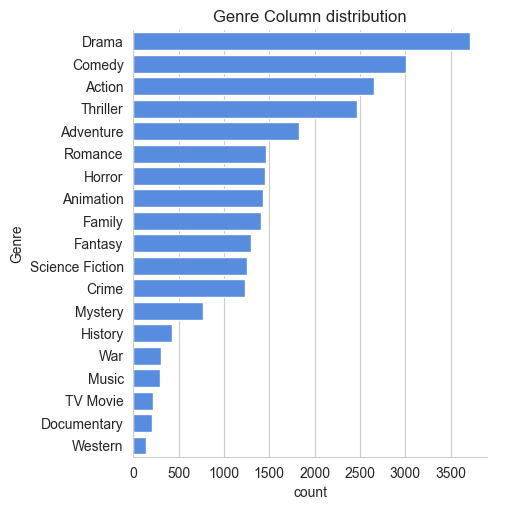

In [27]:
df['Genre'].describe()
# Visulation genre colums

sns.catplot(y = 'Genre', data=df, kind='count',  order=df['Genre'].value_counts().index, color='#4287f4')
plt.title('Genre Column distribution')
plt.show()

Now we can see Drama is in top   in our dataset and 

Q2: What genres has highest votes ?

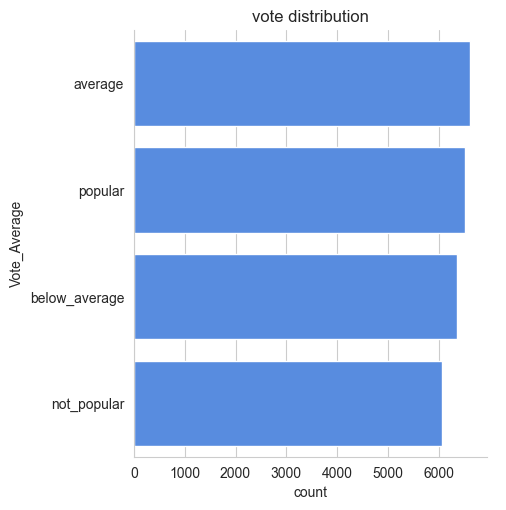

In [28]:
sns.catplot(y = 'Vote_Average', data=df, kind='count',order= df['Vote_Average'].value_counts().index,color='#4287f5')
plt.title('vote distribution')
plt.show()

In [29]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


Q4: What movie got the lowest popularity? what's its genre?

In [30]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


Q5: Which year has the most filmmed movies?

<function matplotlib.pyplot.show(close=None, block=None)>

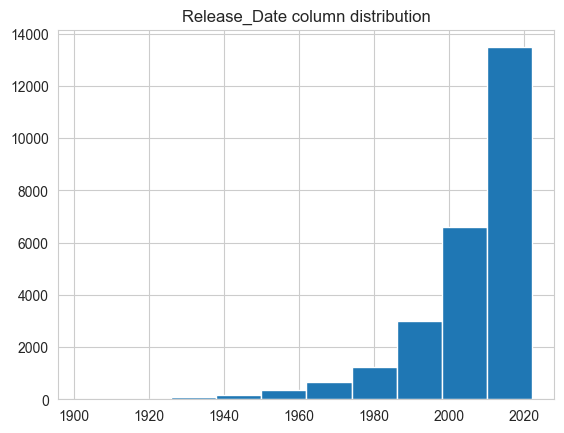

In [31]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show

Conclusion:

Q1: What is the most frequent genre in the dataset?

Drama Genre is most frequent genre in dataset it apprared more than 14% of the times among 19 other groups

Q2: What genres has highest votes ?

we have 25.5% of our dataset with popular vote (6520 rows).
again Drama get higer popularities among people by being having more than 18.5% of movies popularities 

Q3: What movie got the highest popularity ? what's its genre ?

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Science Fiction  which is released on year 2021

Q4: What movie got the lowest popularity ? what's its genre ?

The United States vs. Billie Holiday, thread has the lowest rate in this dataset
it has genres of music , drama , war, sci-fi and history.

Q5: Which year has the most filmmed movies?

The year 2020 has the highest filmming rate in our dataset.